## Visualization and Comparison Notebook for Analyses of Lick Metric Data

*  First part of notebook shows how to use functions for session level comparisons and analyses

In [1]:
from tfcrig import stats
import pandas as pd
from tfcrig.google_drive import GoogleDrive


In [4]:
# load data 
metadata_loc = r'G:\Shared drives\Turi_lab\Data\aging_project\metadata.gsheet'
data_loc = r"G:\Shared drives\Turi_lab\Data\aging_project\VI_98(125)_100(123)_102(1235)_103(125)\cohort_vi_lick_results\cohort6_post_learning_d1.csv"
csv_url = f"https://docs.google.com/spreadsheets/d/1KPs7heuAgJhSsPFOhgvtFXSeeoB55ugBdX5xkxYY4I0/gviz/tq?tqx=out:csv"

df = pd.read_csv(data_loc)
# gd = GoogleDrive()
metadata_df = pd.read_csv(csv_url)
session_df = stats.Session(df, metadata_df)

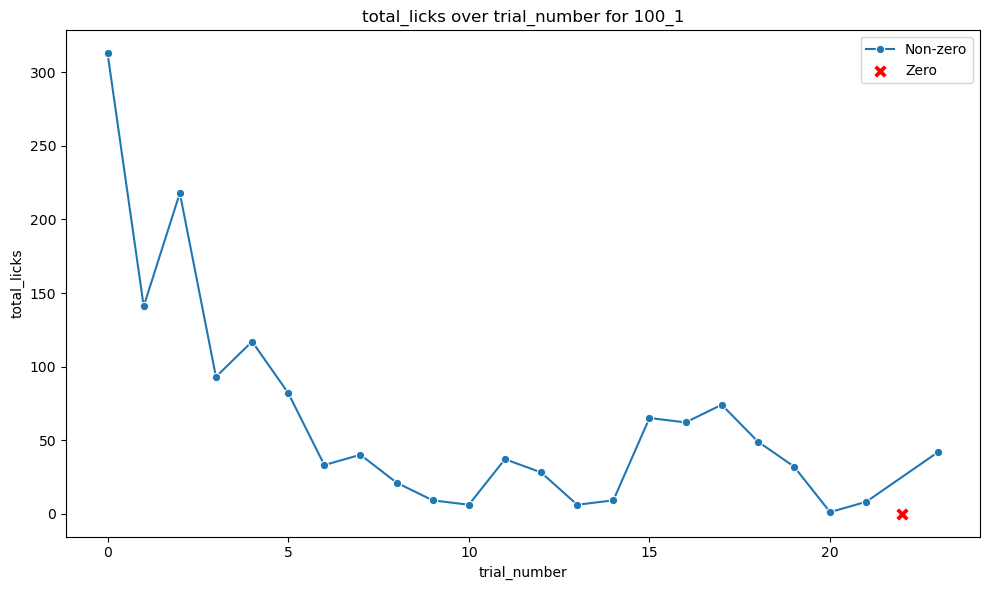

Trials with total_licks == 0 for 100_1: [22]
     trial_number  total_licks
190            22            0


In [6]:
# plotting session data for a single mouse over trials 

session_df.plot_mouse_trials(
    mouse_id='100_1',        # mouse id to plot
    # y = 'total_licks',     # default
    # x = 'trial_number',    # default
    # title=None,            # default
    # ylabel=None,           # default
    # xlabel=None,           # default
    # figsize=(10, 6)        # default
)

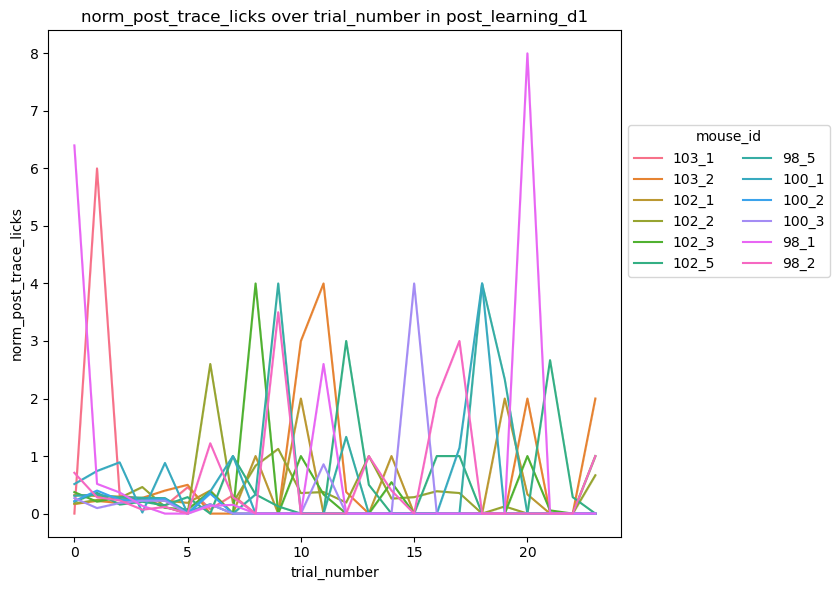

In [8]:
# plotting session data over trials 

session_df.plot_over_trials(
    y='norm_post_trace_licks',
    # x='trial_number',         # default
    # hue='mouse_id',           # default
    # title=None,               # default
    # ylabel=None,              # defaults to y
    # figsize=(10, 5)           # default size
)

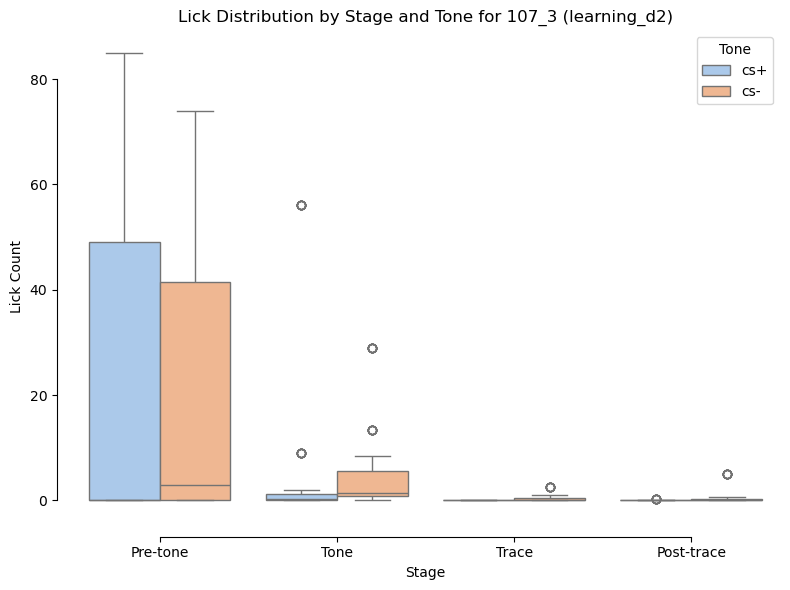

In [3]:
session_df.plot_stage_boxplot_for_mouse("107_3", 
                                        hue="tone",
                                        hue_order=["cs+", "cs-"], 
                                        palette={"cs+": "#A1C9F4", "cs-": "#FFB482"}
)

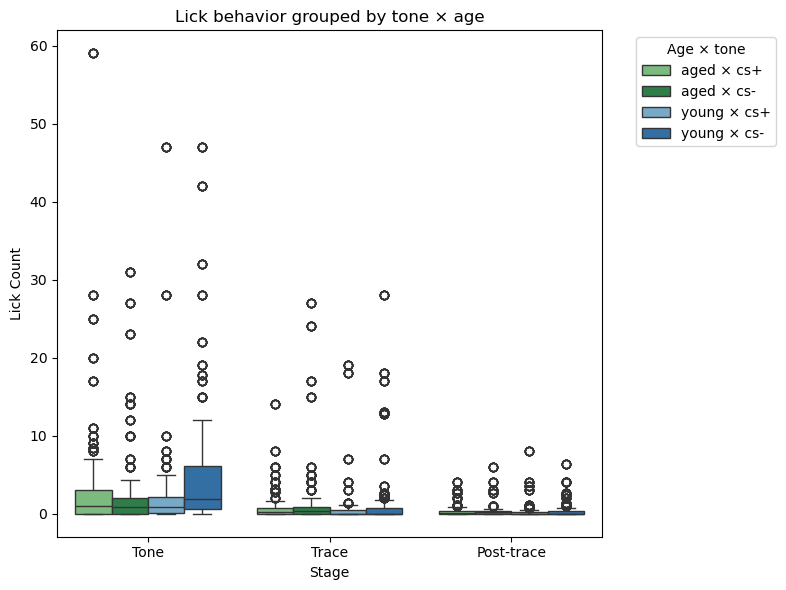

In [3]:
session_df.plot_stage_boxplot_by_group(
    group_vars=["Age", "tone"],
    stage_cols={            
        # "Pre-tone": "pre_tone_licks",
        "Tone": "norm_tone_licks",
        "Trace": "norm_trace_licks",            
        "Post-trace": "norm_post_trace_licks",
        },
    title="Lick behavior grouped by tone × age"
)


*  Second part of this notebook shows cohort-level comparison functions

In [8]:
# use 
from tfcrig.helpers.batch import load_sessions_from_folder
from tfcrig import stats

folder_path = r"G:\Shared drives\Turi_lab\Data\aging_project\VIII_114(135)_115(1235)_116(1235)_117(1235)\try"
folder_data = load_sessions_from_folder(folder_path)

cohort_df = stats.Cohort(folder_data)

In [9]:
# realign trial number: such that trial 0 in the second session will be trial x + 1, where x is the last trial number of the first session

cohort_df.realign_trials_by_session_order([
    "lick_training", "pre_learning", "learning", "post_learning"
])


In [10]:
reward_success_rate = cohort_df.compute_reward_success_rate(groupby_cols=['mouse_id', 'session_id', 'tone', 'airpuff'],
                                                            reward_col="post_trace_licks")
reward_success_rate

,mouse_id,session_id,tone,airpuff,post_trace_licks_success_rate
0,114_1,learning_d7,cs+,no_puff,20.0
1,114_1,learning_d7,cs-,puff,20.0
2,114_1,learning_d8,cs+,no_puff,0.0
3,114_1,learning_d8,cs-,puff,40.0
4,114_1,learning_d9,cs+,no_puff,10.0
...,...,...,...,...,...
85,117_5,learning_d7,cs-,puff,10.0
86,117_5,learning_d8,cs+,no_puff,10.0
87,117_5,learning_d8,cs-,puff,0.0
88,117_5,learning_d9,cs+,no_puff,0.0


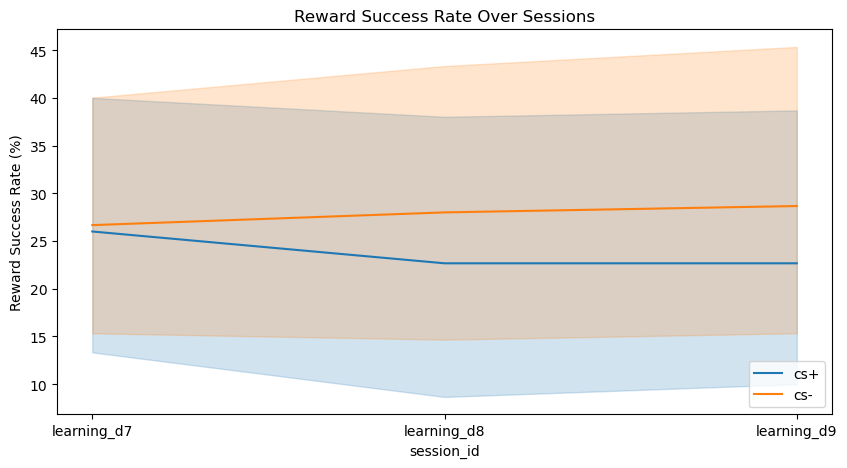

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=reward_success_rate,
    x='session_id',
    y='post_trace_licks_success_rate',
    hue='tone')
plt.title('Reward Success Rate Over Sessions')
plt.ylabel('Reward Success Rate (%)')
plt.legend(loc='lower right')